# Homework Assignment 1
**Owen Erker**

---

In [5]:
import skimage
import pydicom
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage
import os

---

## 1.0 Image Visualization

In [8]:
image_data = {}

for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        file_path = os.path.join(root, file)
        if file.endswith('.dcm'):
            img = pydicom.dcmread(file_path)
            image_data[file] = img.pixel_array
        elif file.endswith('.nii'):
            img = nib.load(file_path)
            image_data[file] = img.get_fdata()

image_data.keys()

dict_keys(['coronacases_org_008.nii', '1-05.dcm', '1-10.dcm', '1-15.dcm', 'cropped_US16.nii'])

---

## 1.1 DICOM Images

In [11]:
dcm_1_05 = image_data['1-05.dcm']

In [12]:
# Q1
height, width = dcm_1_05.shape

print(f'Width: {width} pixels, Height: {height} pixels')

Width: 512 pixels, Height: 512 pixels


In [13]:
# Q2
pixel_depth = dcm_1_05.dtype

print(f'Pixel depth: {pixel_depth}')

Pixel depth: uint16


In [14]:
# Q3
min_intensity = np.min(dcm_1_05)
max_intensity = np.max(dcm_1_05)

print(f'Min intensity: {min_intensity}\nMax intensity: {max_intensity}')

Min intensity: 0
Max intensity: 160


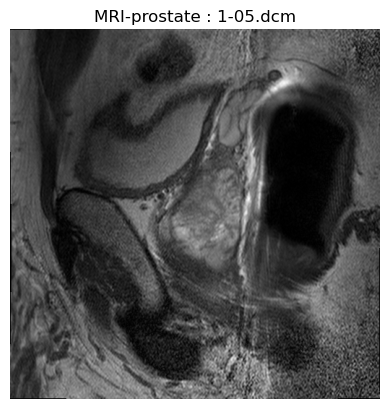

In [15]:
# Q4
plt.imshow(dcm_1_05, cmap='gray')
plt.title('MRI-prostate : 1-05.dcm')
plt.axis('off')
plt.show()

---

## 1.2 NIFTI images

In [18]:
nii_008 = image_data['coronacases_org_008.nii']

In [19]:
# Q5
dimensions = nii_008.shape

print(f'Dimensions: {dimensions}')

Dimensions: (512, 512, 301)


In [20]:
# Q6
pixel_depth = nii_008.dtype

print(f'Pixel depth: {pixel_depth}')

Pixel depth: float64


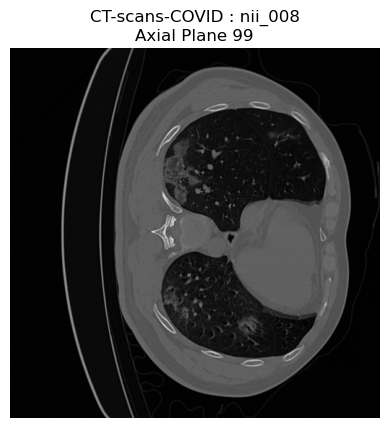

In [21]:
# Q7
plane_index = 99
axial_plane = nii_008[:, :, plane_index]

plt.imshow(axial_plane, cmap='gray')
plt.title(f'CT-scans-COVID : nii_008\nAxial Plane {plane_index}')
plt.axis('off')
plt.show()

In [22]:
# Q8
min_intensity_plane = np.min(axial_plane)
max_intensity_plane = np.max(axial_plane)

print(f'Plane Min intensity: {min_intensity_plane}\nPlane Max intensity: {max_intensity_plane}')

Plane Min intensity: -1021.0
Plane Max intensity: 1819.0


In [23]:
# Q9
min_intensity_volume = np.min(nii_008)
max_intensity_volume = np.max(nii_008)

print(f'Volume Min intensity: {min_intensity_volume}\nVolume Max intensity: {max_intensity_volume}')

Volume Min intensity: -1021.0
Volume Max intensity: 8575.0


---

## 2.0 Histograms

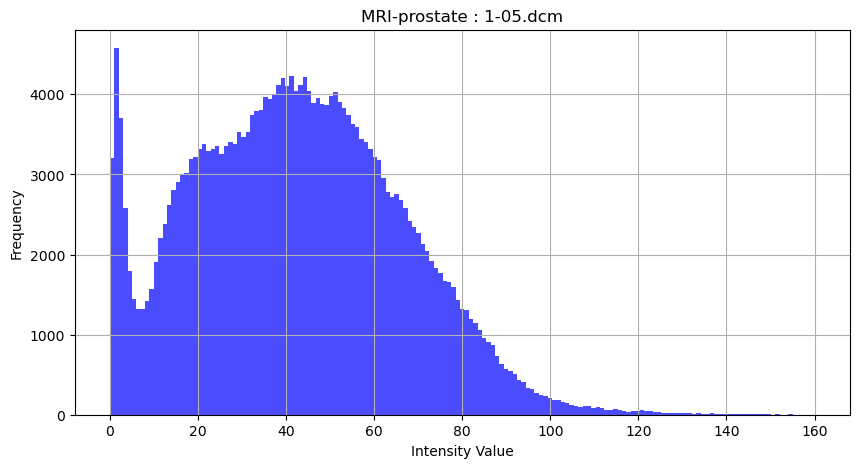

In [26]:
# Q10
max_intensity_dcm = np.max(dcm_1_05)
hist_bins = max_intensity_dcm + 1
hist_values, bin_edges = np.histogram(dcm_1_05, bins = hist_bins, range = (0, max_intensity_dcm))

plt.figure(figsize=(10, 5))
plt.hist(dcm_1_05.ravel(), bins = hist_bins, range = (0, max_intensity_dcm), color='blue', alpha = 0.7)
plt.title('MRI-prostate : 1-05.dcm')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Q11
hist_values, bin_edges = np.histogram(dcm_1_05.ravel(), bins=hist_bins, range=(0, max_intensity_dcm))
peaks, _ = scipy.signal.find_peaks(hist_values, prominence=100)
num_modes = len(peaks)

print(f'Number of modes: {num_modes}')

Number of modes: 6


In [28]:
# Q12
mean_intensity_dcm = np.mean(dcm_1_05)

print(f'Mean intensity: {mean_intensity_dcm:.2f}')

Mean intensity: 42.27


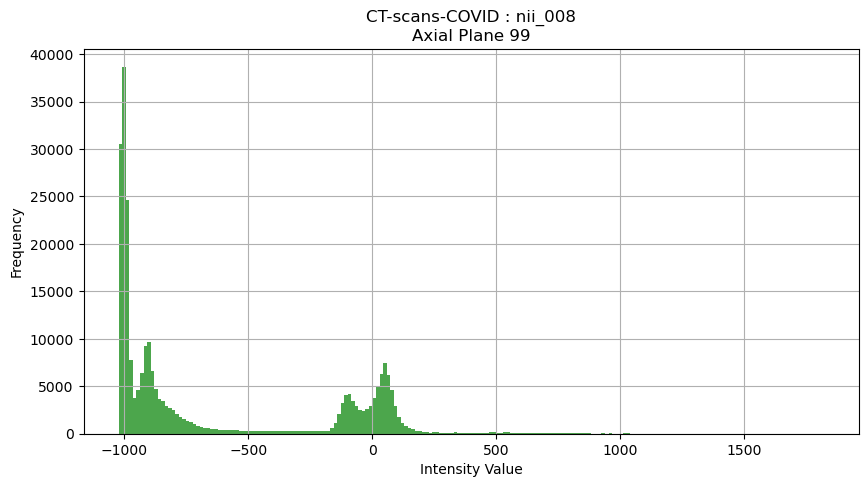

In [29]:
# Q13
plt.figure(figsize=(10, 5))
plt.hist(axial_plane.ravel(), bins=200, color='green', alpha=0.7)
plt.title(f'CT-scans-COVID : nii_008\nAxial Plane {plane_index}')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
# Q14
hist_values_nii, bin_edges_nii = np.histogram(axial_plane.ravel(), bins=200)
peaks_nii, _ = scipy.signal.find_peaks(hist_values_nii, prominence=100)
num_modes_nii = len(peaks_nii)

print(f'Number of modes: {num_modes_nii}')

Number of modes: 4


In [31]:
# Q15
mean_intensity_nii = np.mean(axial_plane)

print(f'Mean intensity: {mean_intensity_nii:.2f}')

Mean intensity: -631.83


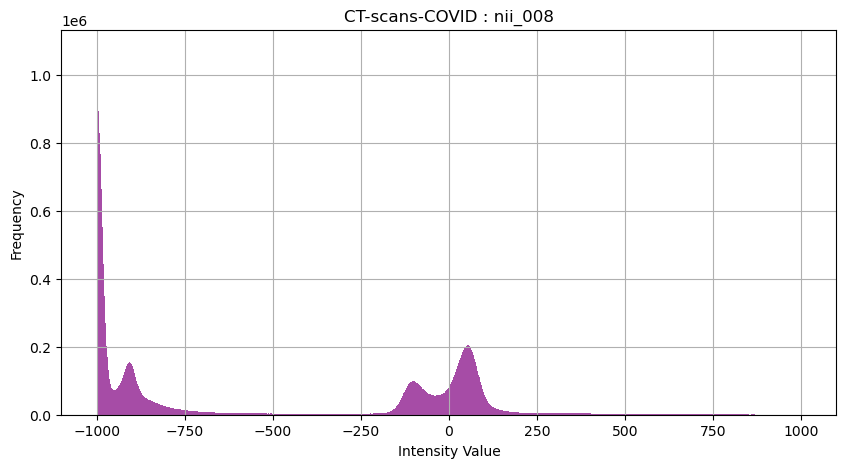

In [32]:
# Q16
plt.figure(figsize=(10, 5))
plt.hist(nii_008.ravel(), bins=2000, range=(-1000, 1000), color='purple', alpha=0.7)
plt.title(f'CT-scans-COVID : nii_008')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Q17
hist_values_3d, bin_edges_3d = np.histogram(nii_008.ravel(), bins=2000, range=(-1000, 1000))
peaks_3d, _ = scipy.signal.find_peaks(hist_values_3d, prominence=100)
num_modes_3d = len(peaks_3d)

print(f'Number of modes: {num_modes_3d}')

Number of modes: 140


In [34]:
# Q18
voxels_below = np.sum(nii_008 < -1000)
voxels_above = np.sum(nii_008 > 1000)
total_voxels = nii_008.size
percent_below = (voxels_below / total_voxels) * 100
percent_above = (voxels_above / total_voxels) * 100

print(f'Total voxels outside Hounsfield Scale: {voxels_below+voxels_above}\nPercent voxels below: {percent_below:.2f}\nPercent voxels above:{percent_above:.2f}')

Total voxels outside Hounsfield Scale: 14842578
Percent voxels below: 18.63
Percent voxels above:0.18


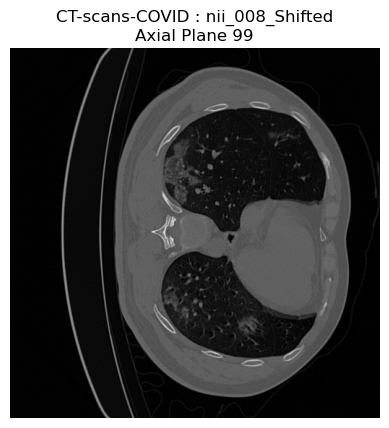

In [35]:
# Q19
min_val = np.min(nii_008)
shift_value = -1000 - min_val
nii_008_shifted = nii_008 - shift_value
plane_index = 99
axial_plane = nii_008_shifted[:, :, plane_index]

plt.imshow(axial_plane, cmap='gray')
plt.title(f'CT-scans-COVID : nii_008_Shifted\nAxial Plane {plane_index}')
plt.axis('off')
plt.show()

---

## 3 Contrast Enhancement

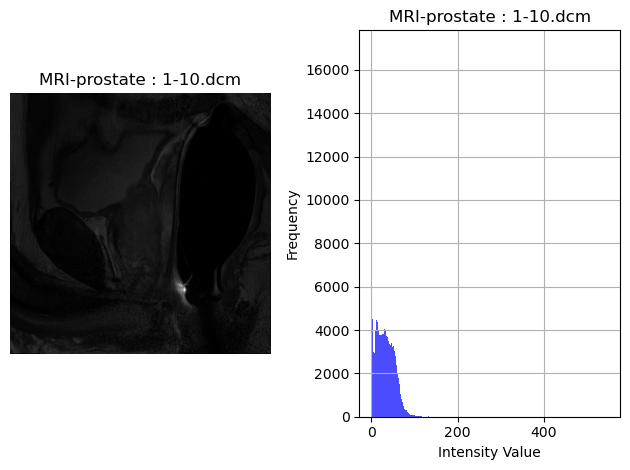

In [38]:
dcm_1_10 = image_data['1-10.dcm']

plt.subplot(1, 2, 1)
plt.imshow(dcm_1_10, cmap='gray')
plt.title('MRI-prostate : 1-10.dcm')
plt.axis('off')

max_intensity_dcm = np.max(dcm_1_10)
hist_bins = max_intensity_dcm + 1
hist_values, bin_edges = np.histogram(dcm_1_10, bins = hist_bins, range = (0, max_intensity_dcm))

plt.subplot(1, 2, 2)
plt.hist(dcm_1_10.ravel(), bins = hist_bins, range = (0, max_intensity_dcm), color='blue', alpha = 0.7)
plt.title('MRI-prostate : 1-10.dcm')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

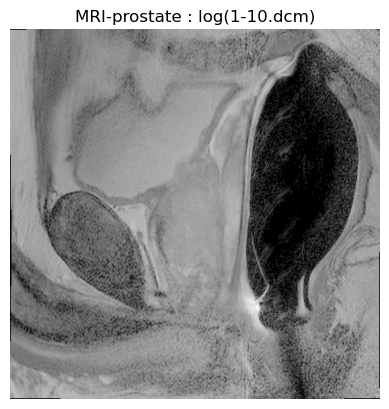

In [39]:
# Q20 - T(I(x)) = c*log(1+I(x))
dcm_1_10_log = np.log(1+dcm_1_10)

plt.imshow(dcm_1_10_log, cmap='gray')
plt.title('MRI-prostate : log(1-10.dcm)')
plt.axis('off')
plt.show()

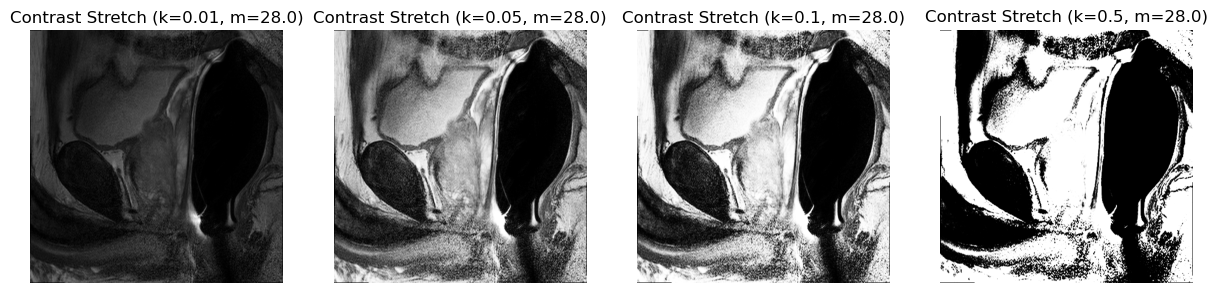

THe values k=0.5 and m=28.0 appears to work best.  The image with these values maintains its finer details while still making differences in contrast much more visible.


In [40]:
# Q21 -T(I(x)) = 1/(1+(m/I(x)})^k)
m = np.median(dcm_1_10)
k_values = [0.01, 0.05, 0.1, 0.5]

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    stretched_image = 1 / (1 + np.exp(-k * (dcm_1_10 - m)))
    
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(stretched_image, cmap='gray')
    plt.title(f'Contrast Stretch (k={k}, m={m:.1f})')
    plt.axis('off')

plt.show()

print(f'THe values k=0.5 and m=28.0 appears to work best.  The image with these values maintains its finer details while still making differences in contrast much more visible.')

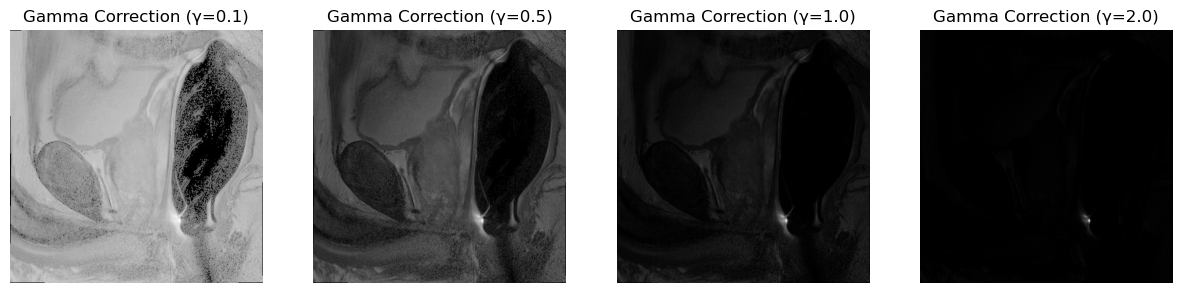

The values γ=0.1, c=1, and ϵ=0.001 appear to give the highest contrast image. However, there appears to be some whitewashing, so some fine tuning may still be necessary.


In [41]:
# Q22
def gamma_correction(image, c=1, epsilon=1e-3, gamma=1.0):
    corrected = c * (image + epsilon) ** gamma
    return corrected / np.max(corrected)

gamma_values = [0.1, 0.5, 1.0, 2.0]
c = 1
epsilon = 1e-3

plt.figure(figsize=(15, 5))

for i, gamma in enumerate(gamma_values):
    corrected_image = gamma_correction(dcm_1_10, c, epsilon, gamma)
    
    plt.subplot(1, len(gamma_values), i + 1)
    plt.imshow(corrected_image, cmap='gray')
    plt.title(f'Gamma Correction (γ={gamma})')
    plt.axis('off')

plt.show()

print(f'The values γ=0.1, c={c}, and ϵ={epsilon} appear to give the highest contrast image. However, there appears to be some whitewashing, so some fine tuning may still be necessary.')

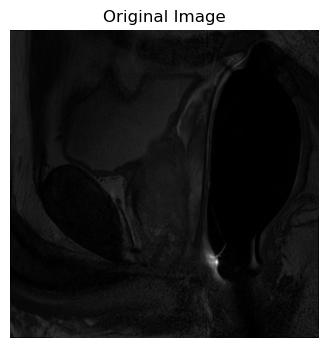

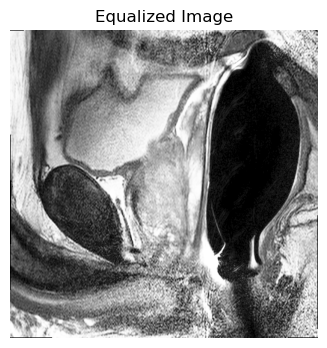

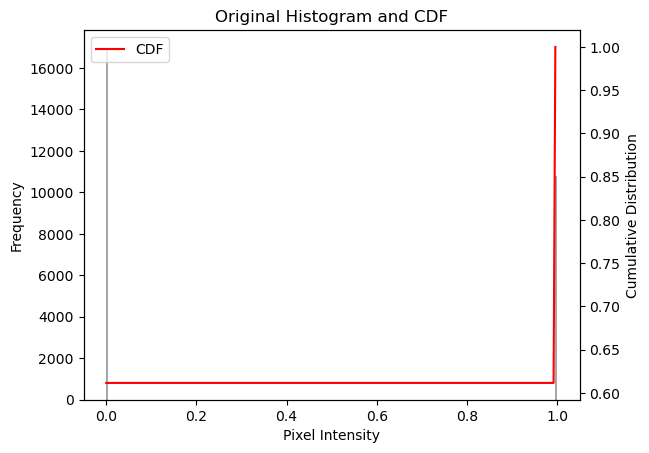

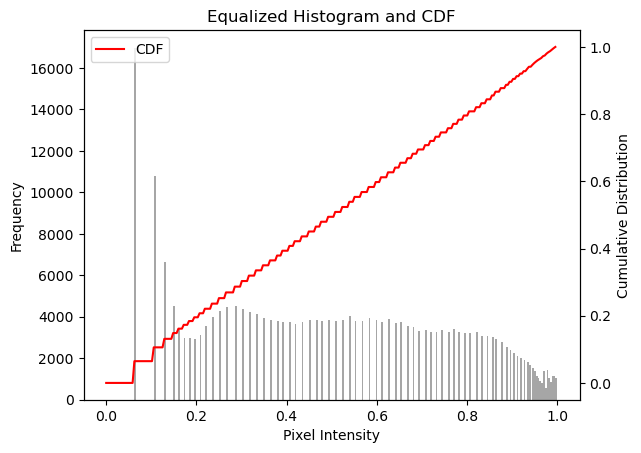

In [42]:
# Q23
def plot_histogram(image, title):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 1], density=True)
    cdf = hist.cumsum()
    cdf = cdf / cdf[-1] 
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.hist(image.flatten(), bins=256, range=[0, 1], color='gray', alpha=0.7, label="Histogram")
    ax2.plot(bins[:-1], cdf, color='r', label="CDF")

    ax1.set_xlabel("Pixel Intensity")
    ax1.set_ylabel("Frequency")
    ax2.set_ylabel("Cumulative Distribution")
    plt.title(title)
    plt.legend()
    plt.show()

equalized_image = skimage.exposure.equalize_hist(dcm_1_10)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(dcm_1_10, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plot_histogram(dcm_1_10, "Original Histogram and CDF")

plot_histogram(equalized_image, "Equalized Histogram and CDF")

---

## 4 Filtering

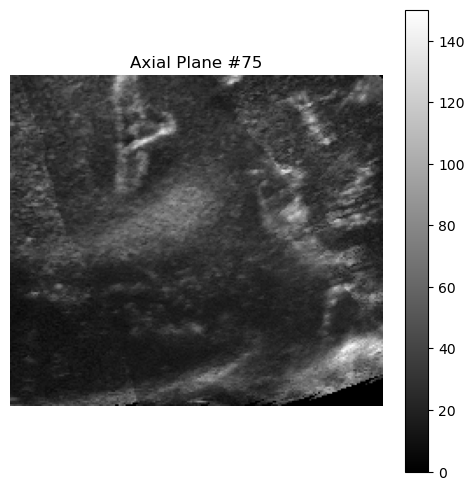

In [45]:
nii_US16 = image_data['cropped_US16.nii']
plane_index = 75
nii_plane_75 = nii_US16[:, :, plane_index]
plt.figure(figsize=(6,6))
plt.imshow(nii_plane_75, cmap="gray")
plt.title("Axial Plane #75")
plt.axis("off")
plt.colorbar()
plt.show()

In [46]:
# Q24
pixel_depth = nii_plane_75.dtype
min_intensity_plane = np.min(nii_plane_75)
max_intensity_plane = np.max(nii_plane_75)

print(f'Pixel Depth: {pixel_depth}\nMin Intensity: {min_intensity_plane}\nMax Intensity: {max_intensity_plane}')

Pixel Depth: float64
Min Intensity: 0.0
Max Intensity: 150.11764526367188


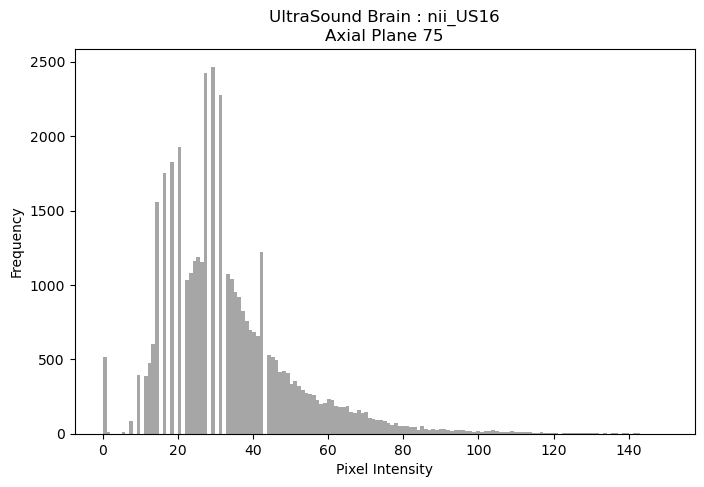

In [47]:
# Q25
num_bins = int(max_intensity_plane) + 1
plt.figure(figsize=(8, 5))
plt.hist(nii_plane_75.flatten(), bins=num_bins, color='gray', alpha=0.7)
plt.title(f'UltraSound Brain : nii_US16\nAxial Plane {plane_index}')
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

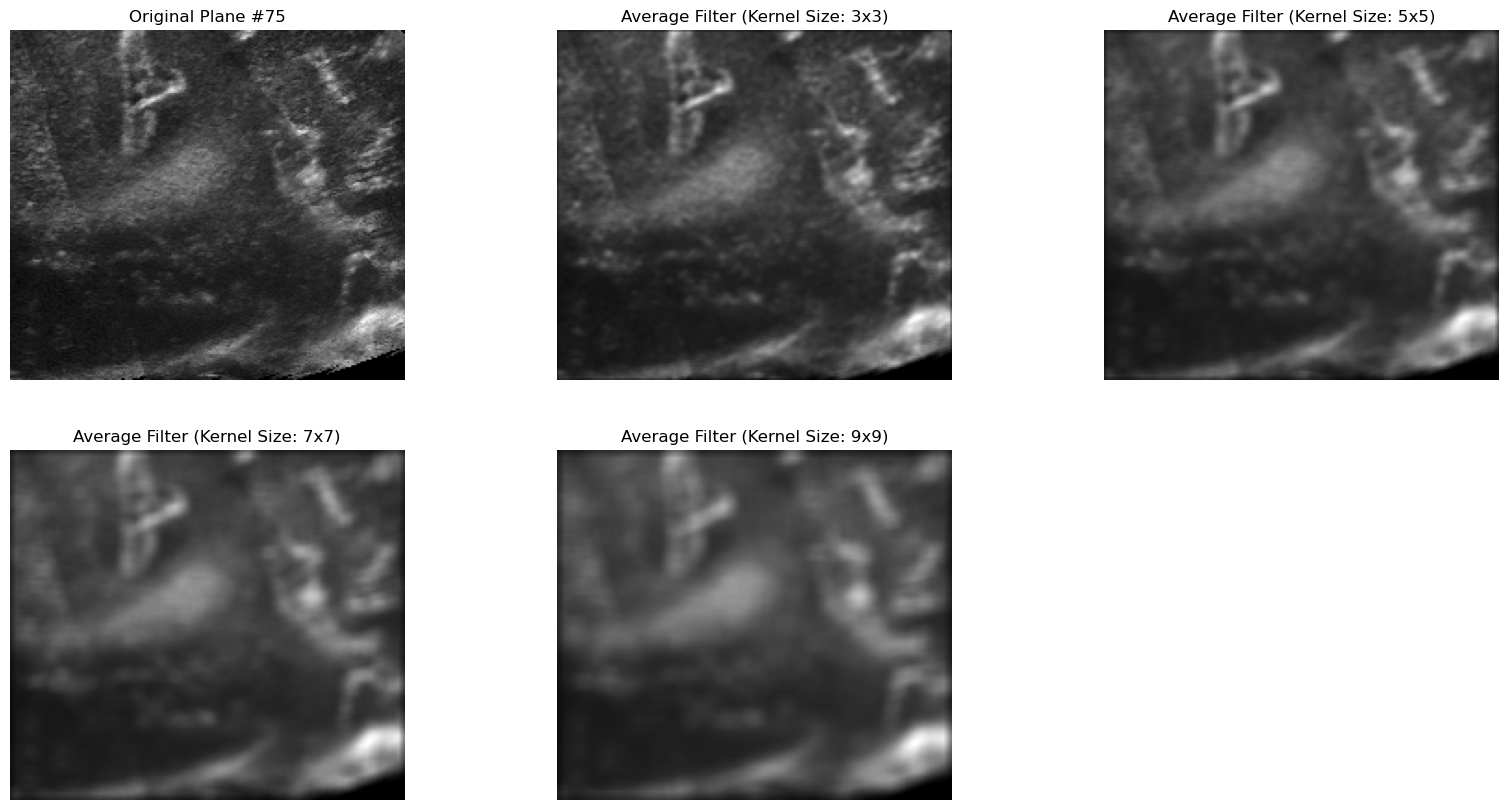

Although difficult to tell, I believe the filter with a kernel size of 5x5 produces a smoother image with well defined edges.


In [48]:
# Q26
def average_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    return scipy.signal.convolve2d(image, kernel, mode='same')

kernel_sizes = [3, 5, 7, 9]

plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(nii_plane_75, cmap='gray')
plt.title('Original Plane #75')
plt.axis('off')

for i, k in enumerate(kernel_sizes):
    filtered_image = average_filter(nii_plane_75, k)
    plt.subplot(2, 3, i+2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Average Filter (Kernel Size: {k}x{k})')
    plt.axis('off')

plt.show()

print(f'Although difficult to tell, I believe the filter with a kernel size of 5x5 produces a smoother image with well defined edges.')

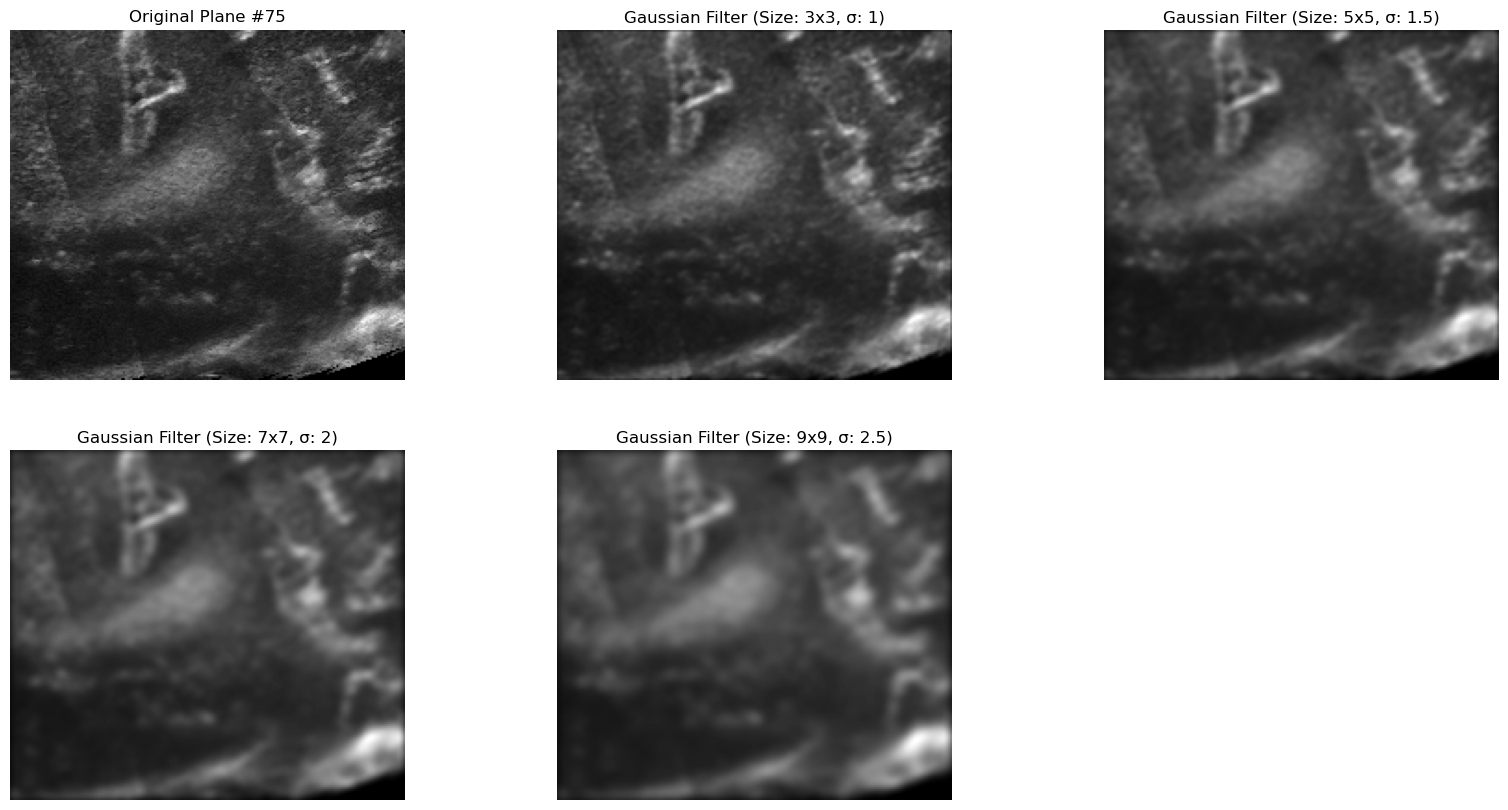

In [49]:
# Q27
def apply_gaussian_filter(image, size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= 2 * np.pi * sigma**2
    kernel / np.sum(kernel)
    
    return scipy.signal.convolve2d(image, kernel, mode='same')

kernel_sizes = [3, 5, 7, 9]
sigmas = [1, 1.5, 2, 2.5]

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(nii_plane_75, cmap='gray')
plt.title('Original Plane #75')
plt.axis('off')

for i, (k, s) in enumerate(zip(kernel_sizes, sigmas)):
    filtered_image = apply_gaussian_filter(nii_plane_75, k, s)
    plt.subplot(2, 3, i+2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Gaussian Filter (Size: {k}x{k}, σ: {s})')
    plt.axis('off')

plt.show()

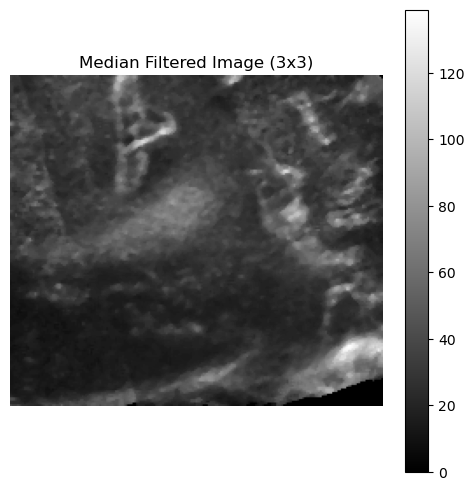

In [50]:
# Q28
median_filtered = scipy.ndimage.median_filter(nii_plane_75, size=3)

plt.figure(figsize=(6,6))
plt.imshow(median_filtered, cmap="gray")
plt.title("Median Filtered Image (3x3)")
plt.axis("off")
plt.colorbar()
plt.show()

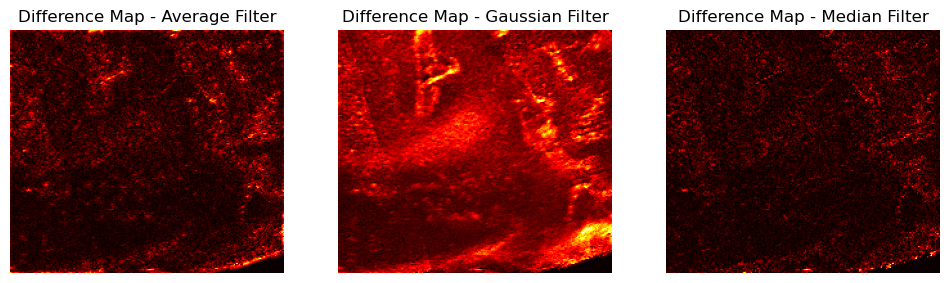

It appears the Median Filter hsa produced an image with the least difference from the original image, while the Gaussian Filter has produced an image significantly different from the original. This is expected, as both the Median and Average Filters take data directly from the original image, while the gaussian directly changes each pixel, creating the greatest divergence from the original.


In [51]:
# Q29
diff_avg = np.abs(nii_plane_75 - average_filter(nii_plane_75, kernel_size=5))
diff_gaussian = np.abs(nii_plane_75 - apply_gaussian_filter(nii_plane_75, 5, 3))
diff_median = np.abs(nii_plane_75 - median_filtered)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(diff_avg, cmap="hot")
plt.title("Difference Map - Average Filter")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(diff_gaussian, cmap="hot")
plt.title("Difference Map - Gaussian Filter")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diff_median, cmap="hot")
plt.title("Difference Map - Median Filter")
plt.axis("off")

plt.show()

print(f'It appears the Median Filter hsa produced an image with the least difference from the original image, while the Gaussian Filter has produced an image significantly different from the original. This is expected, as both the Median and Average Filters take data directly from the original image, while the gaussian directly changes each pixel, creating the greatest divergence from the original.')

---